In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
df_covid = pd.read_csv ('filtered_covid_data.csv')
df_population = pd.read_csv('filtered_population_data.csv')
df_population['Men.Region, subregion, country or area *'] = df_population['Men.Region, subregion, country or area *'].str.lower()
df_population

,Unnamed: 0,Men.Index,Men.Variant,"Men.Region, subregion, country or area *",Men.Country code,Men.Type,Men.Reference date (as of 1 July),Men.Population Men,Women.Population Women,Total Population
0,420,405,Estimates,burundi,108,Country/Area,2020,5899.864,5990.917,11890781.0
1,435,420,Estimates,comoros,174,Country/Area,2020,438.653,430.942,869595.0
2,450,435,Estimates,djibouti,262,Country/Area,2020,518.993,469.009,988002.0
3,465,450,Estimates,eritrea,232,Country/Area,2020,1777.548,1768.879,3546427.0
4,480,465,Estimates,ethiopia,231,Country/Area,2020,57516.835,57446.748,114963583.0
...,...,...,...,...,...,...,...,...,...,...
196,3765,3750,Estimates,luxembourg,442,Country/Area,2020,316.587,309.389,625976.0
197,3780,3765,Estimates,netherlands,528,Country/Area,2020,8537.145,8597.728,17134873.0
198,3795,3780,Estimates,switzerland,756,Country/Area,2020,4293.648,4360.970,8654618.0
199,3825,3810,Estimates,canada,124,Country/Area,2020,18732.178,19009.979,37742157.0


In [3]:
# # get YEARLY total deaths for all countries
# data_early.date = pd.DatetimeIndex(data_early.date)
# data_early_year = data_early.set_index("date").groupby([pd.Grouper(freq="Y"), "location"]).sum().reset_index()
# data_early_year

In [4]:
columns = ['date', 'location', 'total_cases', 'total_deaths', 'icu_patients', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions_per_million','total_tests', 'total_vaccinations','hospital_beds_per_thousand']
data_early = df_covid.filter(columns, axis=1)
data_early


,date,location,total_cases,total_deaths,icu_patients,weekly_icu_admissions_per_million,weekly_hosp_admissions_per_million,total_tests,total_vaccinations,hospital_beds_per_thousand
0,2020-02-29,afghanistan,30.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,2020-03-31,afghanistan,1141.0,21.0,0.0,0.0,0.0,0.0,0.0,15.5
2,2020-04-30,afghanistan,25152.0,812.0,0.0,0.0,0.0,0.0,0.0,15.0
3,2020-05-31,afghanistan,222720.0,4924.0,0.0,0.0,0.0,0.0,0.0,15.5
4,2020-06-30,afghanistan,751685.0,14982.0,0.0,0.0,0.0,0.0,0.0,15.0
...,...,...,...,...,...,...,...,...,...,...
3237,2022-02-28,zimbabwe,6505869.0,150520.0,0.0,0.0,0.0,22367849.0,217644368.0,47.6
3238,2022-03-31,zimbabwe,7524023.0,167954.0,0.0,0.0,0.0,21250408.0,257066255.0,52.7
3239,2022-04-30,zimbabwe,7415825.0,163824.0,0.0,0.0,0.0,13317408.0,281330472.0,51.0
3240,2022-05-31,zimbabwe,7742999.0,170042.0,0.0,0.0,0.0,16009715.0,324533823.0,52.7


In [5]:
# data_early.iloc[:,2:] = data_early.iloc[:,2:].div(1000, axis=0).round(1)
population_dict = dict(zip(df_population['Men.Region, subregion, country or area *'], df_population['Total Population']))
data_early["Population"] = data_early["location"].map(population_dict)
data_early['incident_rate'] = data_early.iloc[:,2].div(data_early['Population'], axis=0).round(2)
data_early['death/case'] = data_early.iloc[:,3].div(data_early['total_cases'], axis=0).round(2)
data_agg = data_early[data_early['date'] == '2020-09-30']
data_agg

,date,location,total_cases,total_deaths,icu_patients,weekly_icu_admissions_per_million,weekly_hosp_admissions_per_million,total_tests,total_vaccinations,hospital_beds_per_thousand,Population,incident_rate,death/case
7,2020-09-30,afghanistan,1166401.0,43060.0,0.0,0.0,0.0,0.0,0.0,15.0,38928341.0,0.03,0.04
36,2020-09-30,algeria,1458290.0,48964.0,968.0,0.0,0.0,0.0,0.0,57.0,43851043.0,0.03,0.03
64,2020-09-30,angola,111469.0,4268.0,0.0,0.0,0.0,0.0,0.0,0.0,32866268.0,0.00,0.04
94,2020-09-30,argentina,17545982.0,371729.0,92628.0,0.0,0.0,59516884.0,0.0,150.0,45195777.0,0.39,0.02
124,2020-09-30,australia,800899.0,24475.0,506.0,0.0,0.0,211842089.0,0.0,115.2,25499881.0,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3109,2020-09-30,uzbekistan,1468909.0,12027.0,0.0,0.0,0.0,0.0,0.0,120.0,33469199.0,0.04,0.01
3137,2020-09-30,venezuela,1870624.0,15250.0,0.0,0.0,0.0,0.0,0.0,24.0,28435943.0,0.07,0.01
3164,2020-09-30,yemen,60327.0,17436.0,0.0,0.0,0.0,0.0,0.0,21.0,29825968.0,0.00,0.29
3192,2020-09-30,zambia,410862.0,9478.0,0.0,0.0,0.0,3928670.0,0.0,60.0,18383956.0,0.02,0.02


In [6]:
data=data_agg.sort_values('total_cases').tail(10)
data['total_cases'] = data.iloc[:,2].div(1000, axis=0).round(1)
data

,date,location,total_cases,total_deaths,icu_patients,weekly_icu_admissions_per_million,weekly_hosp_admissions_per_million,total_tests,total_vaccinations,hospital_beds_per_thousand,Population,incident_rate,death/case
94,2020-09-30,argentina,17546.0,371729.0,92628.0,0.000,0.000,5.951688e+07,0.0,150.0,4.519578e+07,0.39,0.02
2665,2020-09-30,spain,18316.3,907525.0,38510.0,440.667,4746.307,2.505386e+08,0.0,89.1,4.675478e+07,0.39,0.05
2579,2020-09-30,south africa,19588.0,468375.0,3338.0,0.000,143.383,1.186458e+08,0.0,69.6,5.930869e+07,0.33,0.02
1756,2020-09-30,mexico,20309.2,2150492.0,0.0,0.000,0.000,4.751624e+07,0.0,41.4,1.289328e+08,0.16,0.11
639,2020-09-30,colombia,21951.4,697511.0,0.0,0.000,0.000,9.711669e+07,0.0,51.3,5.088288e+07,0.43,0.03
2177,2020-09-30,peru,22054.5,2357120.0,0.0,0.000,0.000,1.074476e+08,0.0,48.0,3.297185e+07,0.67,0.11
2322,2020-09-30,russia,32289.1,565674.0,0.0,0.000,0.000,1.251008e+09,0.0,241.5,1.459345e+08,0.22,0.02
352,2020-09-30,brazil,132259.9,4009882.0,0.0,0.000,0.000,1.653677e+08,0.0,66.0,2.125594e+08,0.62,0.03
1240,2020-09-30,india,151735.2,2476764.0,0.0,0.000,0.000,1.763307e+09,0.0,15.9,1.380004e+09,0.11,0.02
3081,2020-09-30,united states,199616.8,5860764.0,251091.0,0.000,2384.910,3.162526e+09,0.0,83.1,3.310026e+08,0.60,0.03


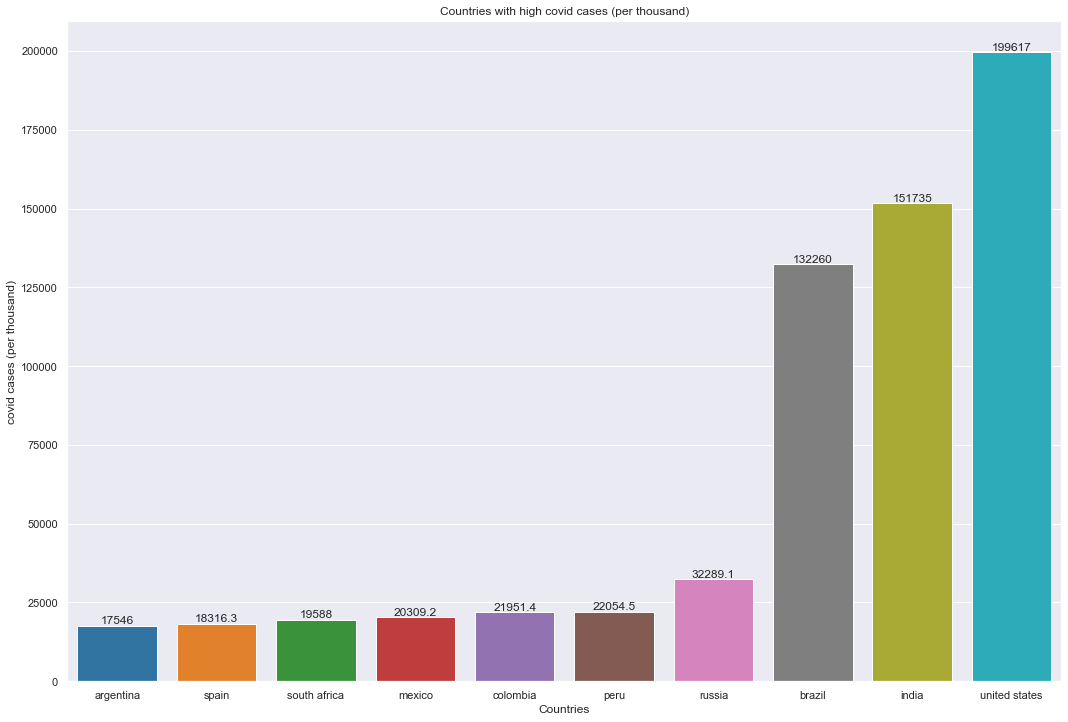

In [21]:
# sns.catplot(data=data, x="location", y="total_cases", kind="bar", ci=None, height=8, aspect=15/8)
# plt.show()
fig_dims = (15, 10)

#set seaborn plotting aesthetics
sns.set(style='white')
sns.set(rc={'figure.figsize':(15,10)})

fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x='location', y='total_cases',
                 data=data,
                 errwidth=0, palette="tab10")
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.title('Countries with high covid cases (per thousand)')
plt.xlabel('Countries')
plt.ylabel('covid cases (per thousand)')
plt.show()

In [8]:
data_incident = data_agg.sort_values('incident_rate').tail(10)
data_incident

,date,location,total_cases,total_deaths,icu_patients,weekly_icu_admissions_per_million,weekly_hosp_admissions_per_million,total_tests,total_vaccinations,hospital_beds_per_thousand,Population,incident_rate,death/case
695,2020-09-30,costa rica,1771225.0,19556.0,0.0,0.000,0.000,5.053205e+06,0.0,33.9,5094114.0,0.35,0.01
2665,2020-09-30,spain,18316260.0,907525.0,38510.0,440.667,4746.307,2.505386e+08,0.0,89.1,46754783.0,0.39,0.05
94,2020-09-30,argentina,17545982.0,371729.0,92628.0,0.000,0.000,5.951688e+07,0.0,150.0,45195777.0,0.39,0.02
639,2020-09-30,colombia,21951355.0,697511.0,0.0,0.000,0.000,9.711669e+07,0.0,51.3,50882884.0,0.43,0.03
2064,2020-09-30,oman,2740993.0,24157.0,0.0,0.000,0.000,0.000000e+00,0.0,48.0,5106622.0,0.54,0.01
3081,2020-09-30,united states,199616815.0,5860764.0,251091.0,0.000,2384.910,3.162526e+09,0.0,83.1,331002647.0,0.60,0.03
1355,2020-09-30,israel,5221620.0,37032.0,4977.0,262.620,4181.359,8.639316e+07,0.0,89.7,8655541.0,0.60,0.01
352,2020-09-30,brazil,132259920.0,4009882.0,0.0,0.000,0.000,1.653677e+08,0.0,66.0,212559409.0,0.62,0.03
2177,2020-09-30,peru,22054476.0,2357120.0,0.0,0.000,0.000,1.074476e+08,0.0,48.0,32971846.0,0.67,0.11
581,2020-09-30,chile,13147124.0,361583.0,27286.0,501.342,2032.235,8.643040e+07,0.0,63.3,19116209.0,0.69,0.03


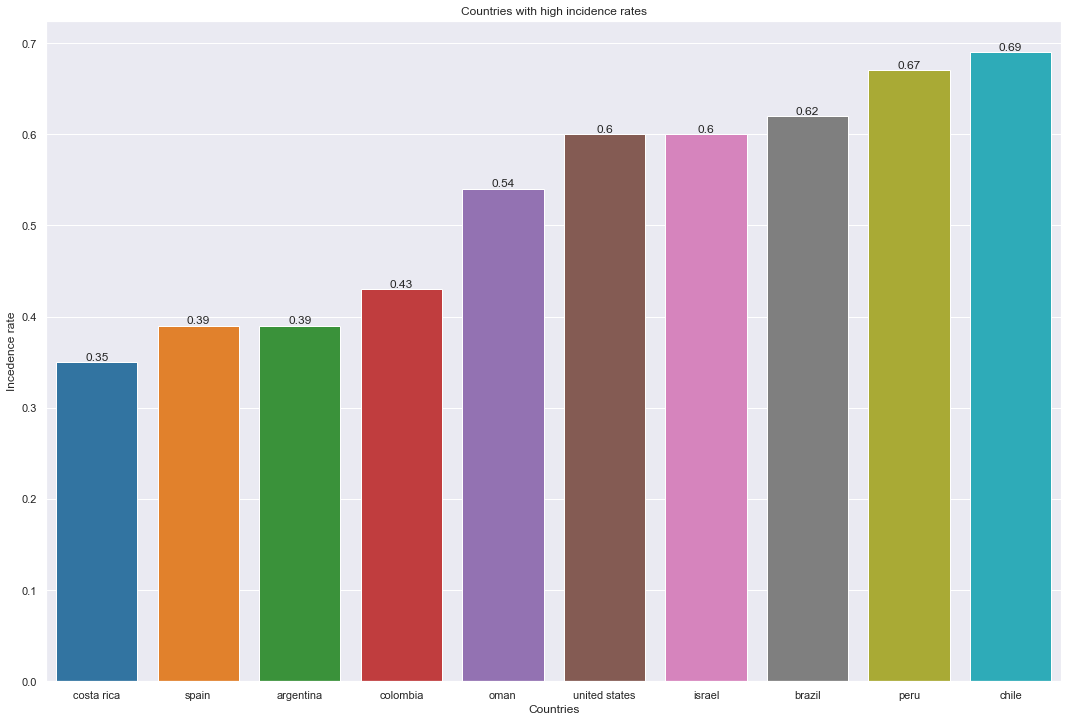

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.catplot(data=data, x="location", y="total_cases", kind="bar", ci=None, height=8, aspect=15/8)
# plt.show()
fig_dims = (15, 10)

fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x='location', y='incident_rate',
                 data=data_incident,
                 errwidth=0, palette="tab10")
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.title('Countries with high incidence rates')
plt.xlabel('Countries')
plt.ylabel('Incedence rate')
plt.show()

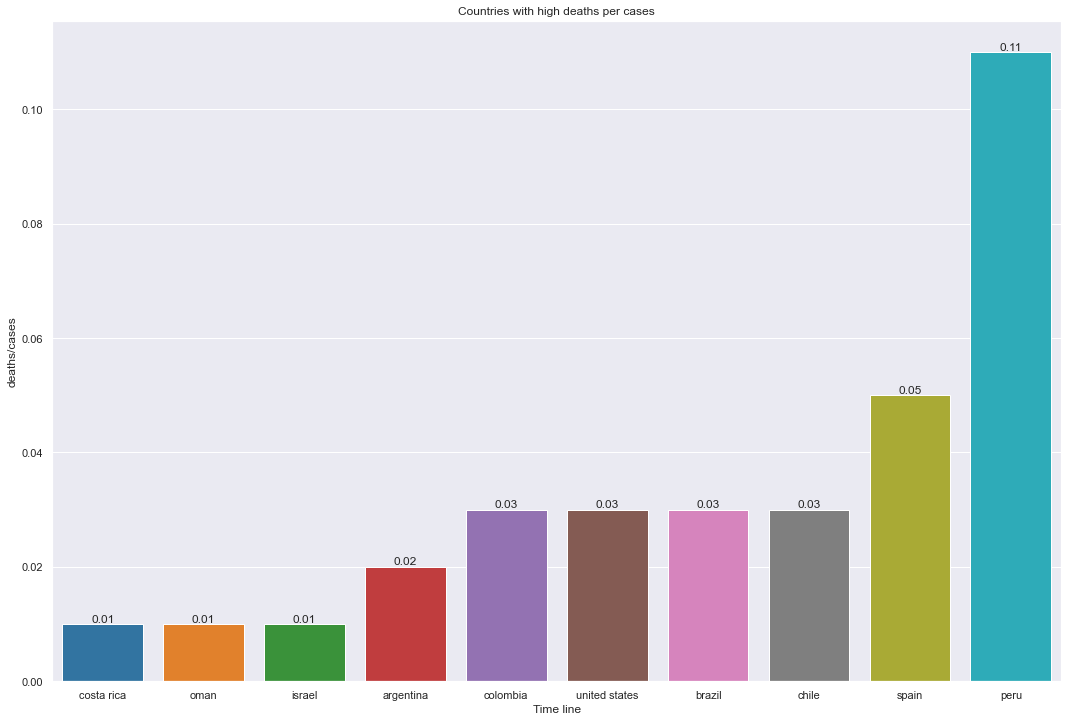

In [10]:
# data_death = data_incident.sort_values('incident_rate').tail(10)
countries = ['costa rica', 'argentina', 'spain', 'colombia', 'oman', 'united states', 'israel', 'brazil', 'peru', 'chile']
data_death = data_incident[data_incident['location'].isin(countries)]
data_death_agg = data_death.sort_values('death/case').tail(10)
fig_dims = (15, 10)

fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x='location', y='death/case',
                 data=data_death_agg,
                 errwidth=0, palette="tab10")
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.title('Countries with high deaths per cases')
plt.xlabel('Time line')
plt.ylabel('deaths/cases')
plt.show()

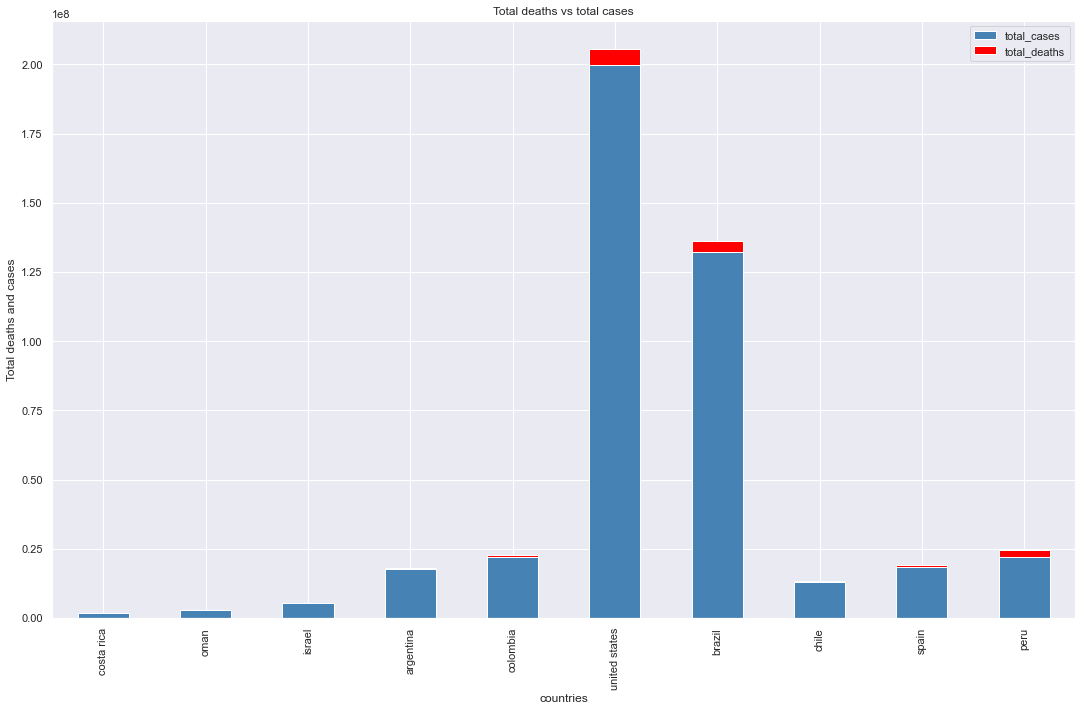

In [62]:
df_stacked = data_death_agg.filter(['location','total_cases', 'total_deaths'], axis=1)

#set seaborn plotting aesthetics
sns.set(style='white')
sns.set(rc={'figure.figsize':(15,10)})

#create stacked bar chart
df_stacked.set_index('location').plot(kind='bar', stacked=True, color=['steelblue', 'red'])
plt.tight_layout()
plt.title('Total deaths vs total cases')
plt.xlabel('countries')
plt.ylabel('Total deaths and cases')
plt.show()

In [53]:
data_timeline = data_early[data_early['date'] <= '2020-09-30']
countries = ['costa rica', 'argentina', 'spain', 'united states','colombia', 'oman', 'israel', 'brazil', 'peru', 'chile']
data_time = data_timeline[data_timeline['location'].isin(countries)]
# data_early.iloc[:,7:8] = data_early.iloc[:,7:8].div(data_early['Population'], axis=0).round(1)
data_early['Test/population'] = data_early.iloc[:,7].div(data_early['Population'], axis=0).round(4)
data_time.date = pd.DatetimeIndex(data_time.date)
data_time

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,date,location,total_cases,total_deaths,icu_patients,weekly_icu_admissions_per_million,weekly_hosp_admissions_per_million,total_tests,total_vaccinations,hospital_beds_per_thousand,Population,incident_rate,death/case,Test/population
86,2020-01-31,argentina,0.0,0.0,0.0,0.0,0.000,1.164700e+04,0.0,155.00,45195777.0,0.00,NaN,0.0003
87,2020-02-29,argentina,0.0,0.0,0.0,0.0,0.000,1.040900e+04,0.0,145.00,45195777.0,0.00,NaN,0.0002
88,2020-03-31,argentina,6529.0,158.0,0.0,0.0,0.000,6.859200e+04,0.0,155.00,45195777.0,0.00,0.02,0.0015
89,2020-04-30,argentina,77576.0,3482.0,0.0,0.0,0.000,1.074259e+06,0.0,150.00,45195777.0,0.00,0.04,0.0238
90,2020-05-31,argentina,275556.0,11562.0,0.0,0.0,0.000,4.061031e+06,0.0,155.00,45195777.0,0.01,0.04,0.0899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3077,2020-05-31,united states,45295935.0,2801027.0,0.0,0.0,0.000,4.002534e+08,0.0,85.87,331002647.0,0.14,0.06,1.2092
3078,2020-06-30,united states,64824691.0,3569826.0,0.0,0.0,0.000,8.395643e+08,0.0,83.10,331002647.0,0.20,0.06,2.5364
3079,2020-07-31,united states,111091477.0,4324633.0,212645.0,0.0,1121.174,1.591176e+09,0.0,85.87,331002647.0,0.34,0.04,4.8071
3080,2020-08-31,united states,166536350.0,5258579.0,373108.0,0.0,3023.445,2.448888e+09,0.0,85.87,331002647.0,0.50,0.03,7.3984


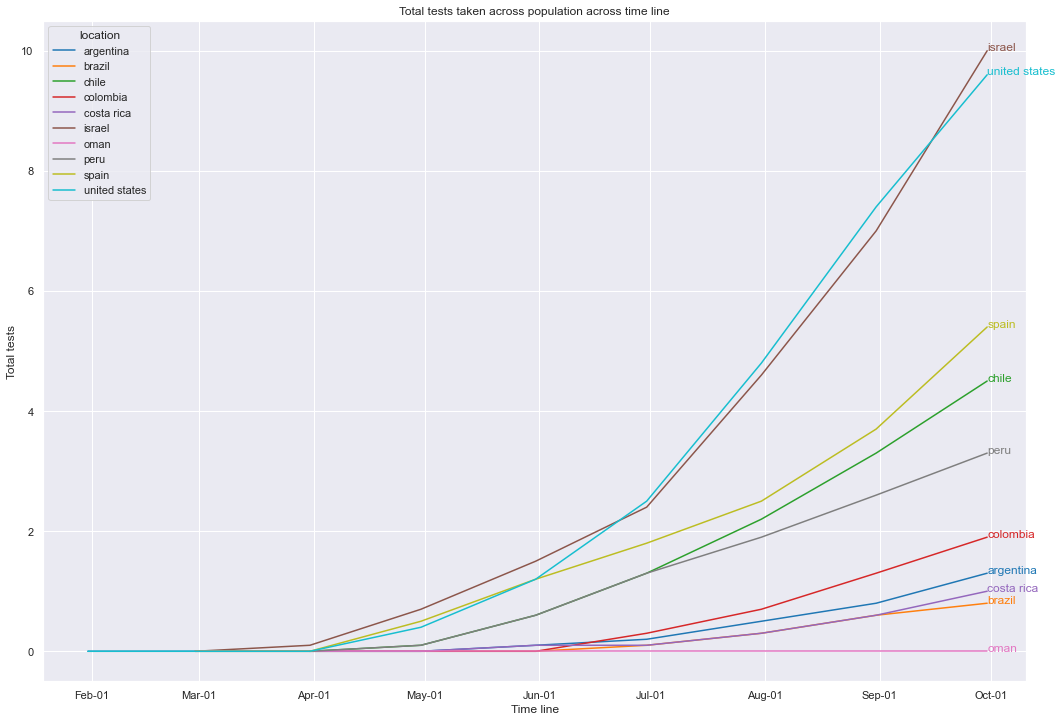

In [33]:
# fig_dims = (15, 10)

# fig, ax = plt.subplots(figsize=fig_dims)
# sns.lineplot(data=data_time, x="date", y="total_tests", 
#              hue="location").set(title='Total tests taken across months')
# plt.xticks(rotation=45)

#set seaborn plotting aesthetics
sns.set(style='white')
sns.set(rc={'figure.figsize':(15,10)})

# Make a plot
fig, ax = plt.subplots()

# Add lines to it
from matplotlib import rcParams

rcParams['figure.figsize'] = 20,15
sns.lineplot(ax=ax, data=data_time, x="date", y="Test/population", hue="location", legend=True, palette="tab10")

# Add the text--for each line, find the end, annotate it with a label, and
# adjust the chart axes so that everything fits on.
for line, name in zip(ax.lines, data_time.location.unique().tolist()):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue     
    text = ax.annotate(name,
               xy=(x, y),
               xytext=(0, 0),
               color=line.get_color(),
               xycoords=(ax.get_xaxis_transform(),
                 ax.get_yaxis_transform()),
               textcoords="offset points")
    text_width = (text.get_window_extent(
    fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * .5)

# Format the date axis to be prettier.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.xaxis.set_major_locator(mdates.AutoDateLocator(interval_multiples=False))
plt.tight_layout()
plt.title('Total tests taken across population across time line')
plt.xlabel('Time line')
plt.ylabel('Total tests')
plt.show()

In [55]:
data = data_time.filter(['date','location','death/case'], axis=1)
data.to_csv('areachart2.csv')

In [58]:
filename = 'areachart2.csv'
df = pd.read_csv (filename)
df

,date,argentia,brazil,chile,colombia,costarica,israle,oman,peru,spain,us
0,29/02/2020,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,31/03/2020,0.02,0.03,0.00,0.01,0.01,0.00,0.00,0.11,0.07,0.02
2,30/04/2020,0.04,0.06,0.01,0.04,0.01,0.01,0.01,0.12,0.10,0.05
3,31/05/2020,0.04,0.06,0.01,0.04,0.01,0.02,0.00,0.14,0.12,0.06
4,30/06/2020,0.02,0.05,0.02,0.03,0.01,0.02,0.00,0.13,0.11,0.06
5,31/07/2020,0.02,0.04,0.02,0.03,0.01,0.01,0.00,0.14,0.11,0.04
6,31/08/2020,0.02,0.03,0.03,0.03,0.01,0.01,0.01,0.12,0.08,0.03
7,30/09/2020,0.02,0.03,0.03,0.03,0.01,0.01,0.01,0.11,0.05,0.03


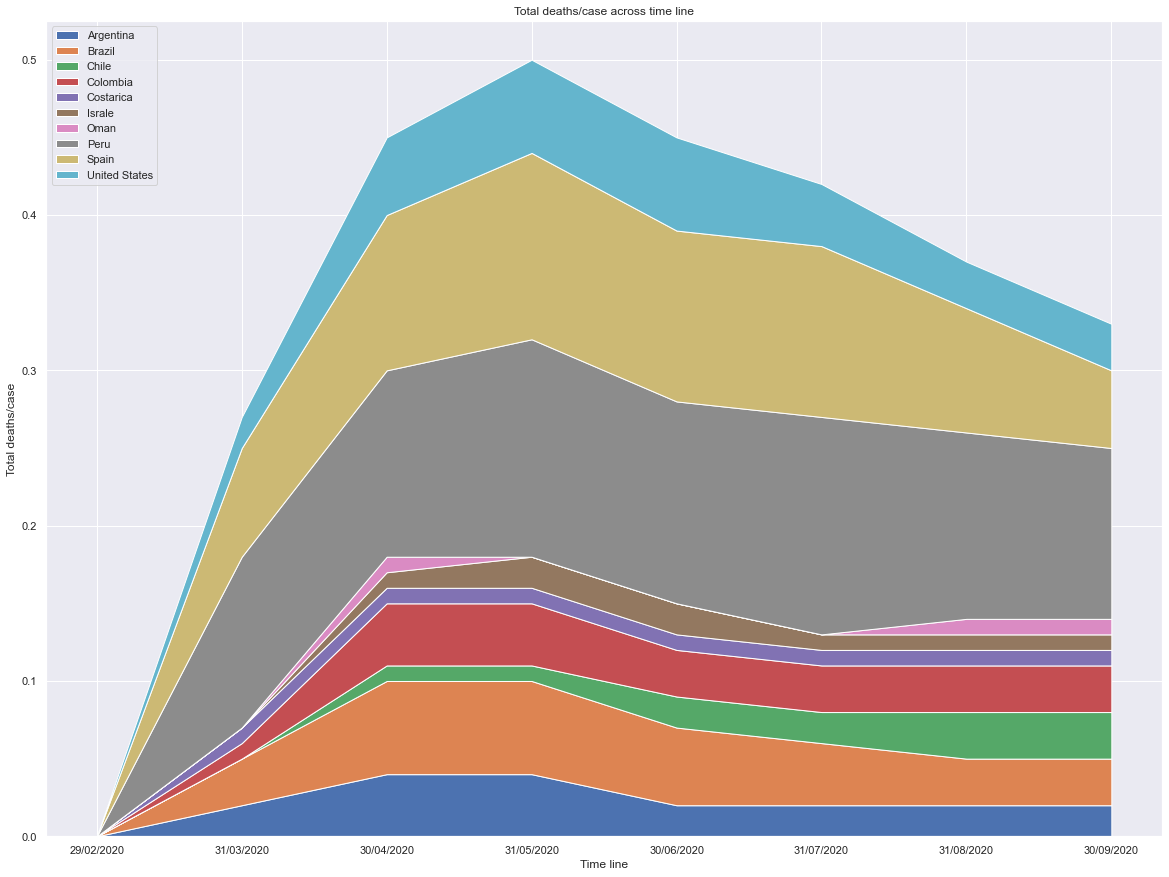

In [60]:
# Basic stacked area chart.
plt.stackplot(df.date.tolist(),df.argentia.tolist(), df.brazil.tolist(), df.chile.tolist(),
              df.colombia.tolist(), df.costarica.tolist(), df.israle.tolist(),
              df.oman.tolist(), df.peru.tolist(), df.spain.tolist(), df.us.tolist(),
               labels=['Argentina','Brazil','Chile', 'Colombia', 'Costarica',
                                              'Israle', 'Oman', 'Peru', 'Spain', 'United States'])
plt.legend(loc='upper left')
plt.title('Total deaths/case across time line')
plt.xlabel('Time line')
plt.ylabel('Total deaths/case')
plt.show()

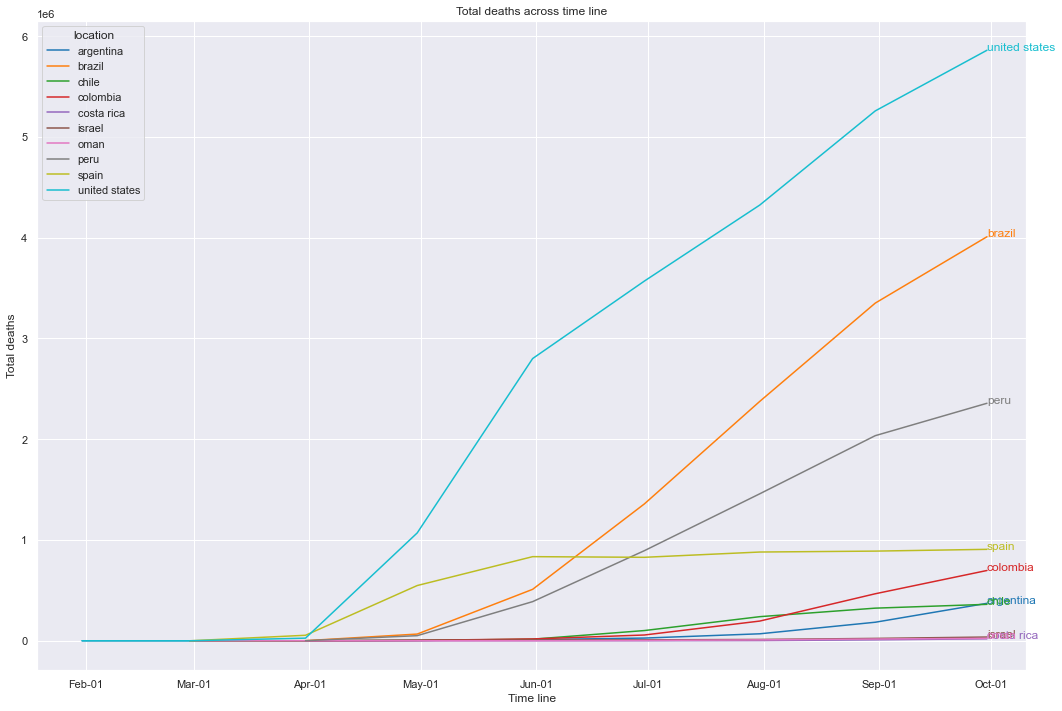

In [19]:
# plt.figure(figsize = (20,15))
# ax = sns.lineplot(data=data_time, x="date", y="total_deaths", 
#                   hue="location").set(title='Total Vaccinations across months')
# plt.xticks(rotation=45)

#set seaborn plotting aesthetics
sns.set(style='white')
sns.set(rc={'figure.figsize':(15,10)})

# Make a plot
fig, ax = plt.subplots()

# Add lines to it
from matplotlib import rcParams

rcParams['figure.figsize'] = 20,15
sns.lineplot(ax=ax, data=data_time, x="date", y="total_deaths", hue="location", legend=True, palette="tab10")

# Add the text--for each line, find the end, annotate it with a label, and
# adjust the chart axes so that everything fits on.
for line, name in zip(ax.lines, data_time.location.unique().tolist()):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue     
    text = ax.annotate(name,
               xy=(x, y),
               xytext=(0, 0),
               color=line.get_color(),
               xycoords=(ax.get_xaxis_transform(),
                 ax.get_yaxis_transform()),
               textcoords="offset points")
    text_width = (text.get_window_extent(
    fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * .5)

# Format the date axis to be prettier.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.xaxis.set_major_locator(mdates.AutoDateLocator(interval_multiples=False))
plt.tight_layout()
plt.title('Total deaths across time line')
plt.xlabel('Time line')
plt.ylabel('Total deaths')
plt.show()

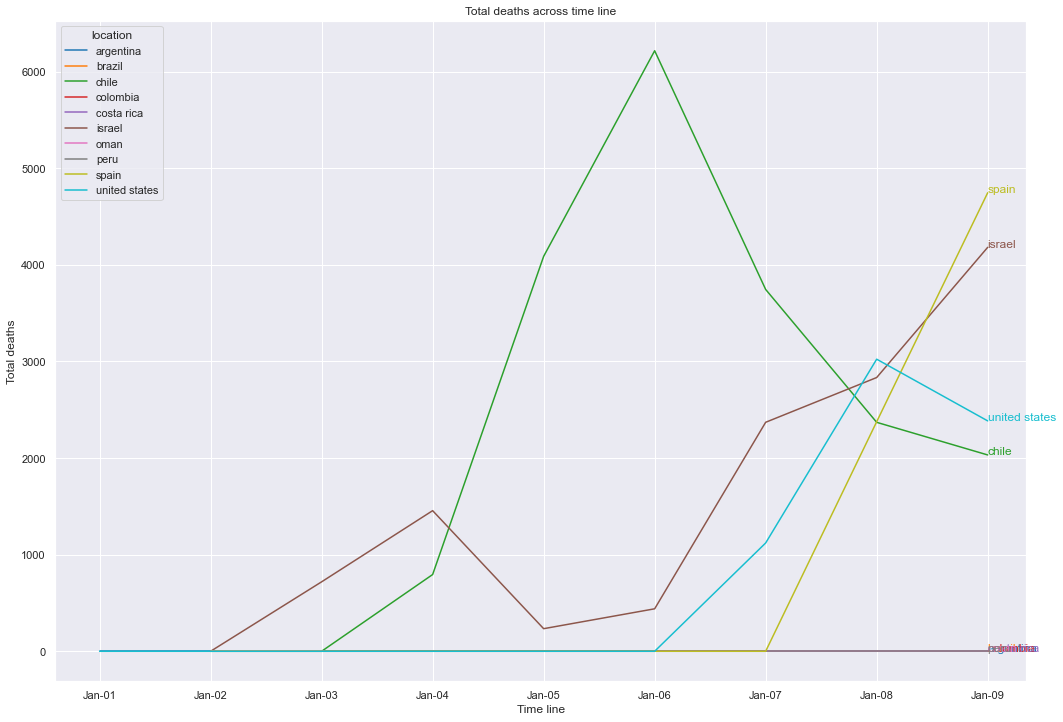

In [16]:
# plt.figure(figsize = (20,15))
# ax = sns.lineplot(data=data_time, x="date", y="weekly_icu_admissions", 
#                   hue="location").set(title='Total weekly hospital admissions across months')
# plt.xticks(rotation=45)

#set seaborn plotting aesthetics
sns.set(style='white')
sns.set(rc={'figure.figsize':(15,10)})

# Make a plot
fig, ax = plt.subplots()

# Add lines to it
from matplotlib import rcParams

rcParams['figure.figsize'] = 20,15
sns.lineplot(ax=ax, data=data_time, x="date", y="weekly_hosp_admissions_per_million", hue="location", legend=True, palette="tab10")

# Add the text--for each line, find the end, annotate it with a label, and
# adjust the chart axes so that everything fits on.
for line, name in zip(ax.lines, data_time.location.unique().tolist()):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue     
    text = ax.annotate(name,
               xy=(x, y),
               xytext=(0, 0),
               color=line.get_color(),
               xycoords=(ax.get_xaxis_transform(),
                 ax.get_yaxis_transform()),
               textcoords="offset points")
    text_width = (text.get_window_extent(
    fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * .5)

# Format the date axis to be prettier.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.xaxis.set_major_locator(mdates.AutoDateLocator(interval_multiples=False))
plt.tight_layout()
plt.title('Total deaths across time line')
plt.xlabel('Time line')
plt.ylabel('Total deaths')
plt.show()

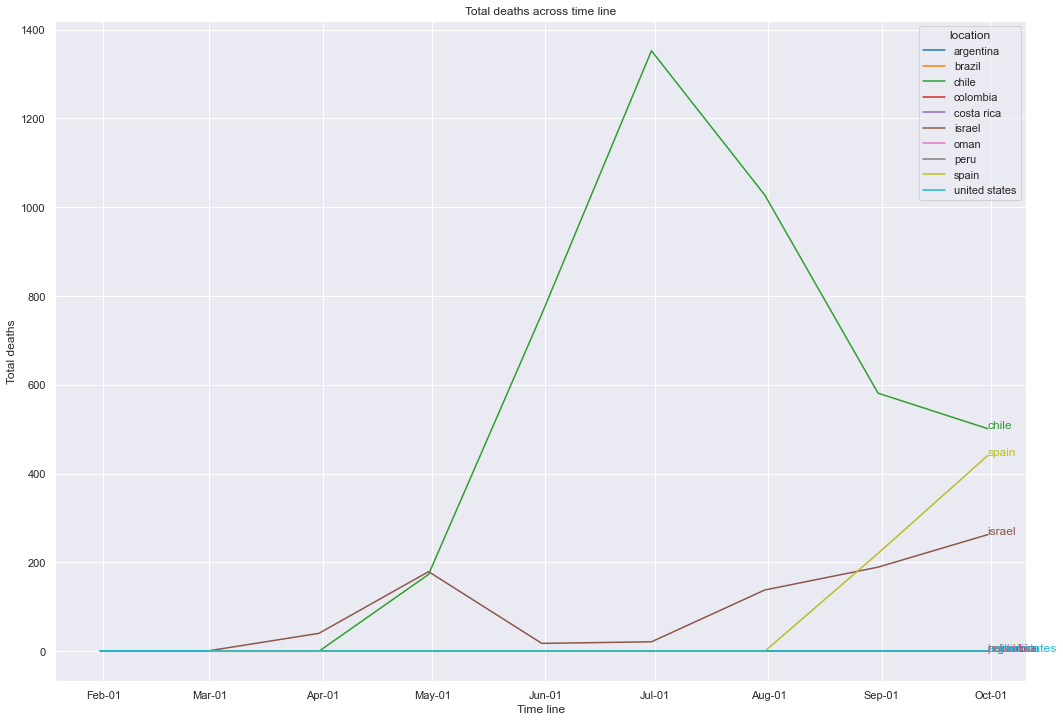

In [20]:
#set seaborn plotting aesthetics
sns.set(style='white')
sns.set(rc={'figure.figsize':(15,10)})

# Make a plot
fig, ax = plt.subplots()

# Add lines to it
from matplotlib import rcParams

rcParams['figure.figsize'] = 20,15
sns.lineplot(ax=ax, data=data_time, x="date", y="weekly_icu_admissions_per_million", hue="location", legend=True, palette="tab10")

# Add the text--for each line, find the end, annotate it with a label, and
# adjust the chart axes so that everything fits on.
for line, name in zip(ax.lines, data_time.location.unique().tolist()):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue     
    text = ax.annotate(name,
               xy=(x, y),
               xytext=(0, 0),
               color=line.get_color(),
               xycoords=(ax.get_xaxis_transform(),
                 ax.get_yaxis_transform()),
               textcoords="offset points")
    text_width = (text.get_window_extent(
    fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * .5)

# Format the date axis to be prettier.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.xaxis.set_major_locator(mdates.AutoDateLocator(interval_multiples=False))
plt.tight_layout()
plt.title('Total deaths across time line')
plt.xlabel('Time line')
plt.ylabel('Total deaths')
plt.show()

In [27]:
data_grouped = data_time.groupby(['location']).mean().reset_index()

data=data_grouped.sort_values('hospital_beds_per_thousand').tail(10)
data

,location,total_cases,total_deaths,icu_patients,weekly_icu_admissions_per_million,weekly_hosp_admissions_per_million,total_tests,total_vaccinations,hospital_beds_per_thousand,Population,incident_rate,death/case
4,costa rica,4.395960e+05,4.470857e+03,0.000000,0.000000,0.000000,1.623269e+06,0.0,33.738571,5094114.0,0.085714,0.010000
6,oman,1.022525e+06,6.887625e+03,0.000000,0.000000,0.000000,0.000000e+00,0.0,44.000000,5106622.0,0.201250,0.003750
7,peru,8.475352e+06,1.026553e+06,0.000000,0.000000,0.000000,4.583967e+07,0.0,47.771429,32971846.0,0.257143,0.124286
3,colombia,6.341896e+06,2.056090e+05,0.000000,0.000000,0.000000,3.079075e+07,0.0,51.055714,50882884.0,0.122857,0.030000
2,chile,5.428676e+06,1.306500e+05,26276.500000,549.392125,2405.789000,2.878094e+07,0.0,58.288750,19116209.0,0.282500,0.015000
1,brazil,4.196000e+07,1.459210e+06,0.000000,0.000000,0.000000,4.839818e+07,0.0,59.950000,212559409.0,0.197500,0.037500
9,united states,6.759152e+07,2.545693e+06,92982.666667,0.000000,725.503222,9.531625e+08,0.0,77.867778,331002647.0,0.204444,0.032222
5,israel,1.389490e+06,1.191100e+04,622.125000,106.098000,1529.207500,2.844724e+07,0.0,83.720000,8655541.0,0.160000,0.010000
8,spain,7.252864e+06,6.180265e+05,6841.125000,82.634625,890.289500,8.786843e+07,0.0,90.213750,46754783.0,0.155000,0.080000
0,argentina,3.552203e+06,7.410033e+04,18961.777778,0.000000,0.000000,1.475671e+07,0.0,152.222222,45195777.0,0.077778,0.025714


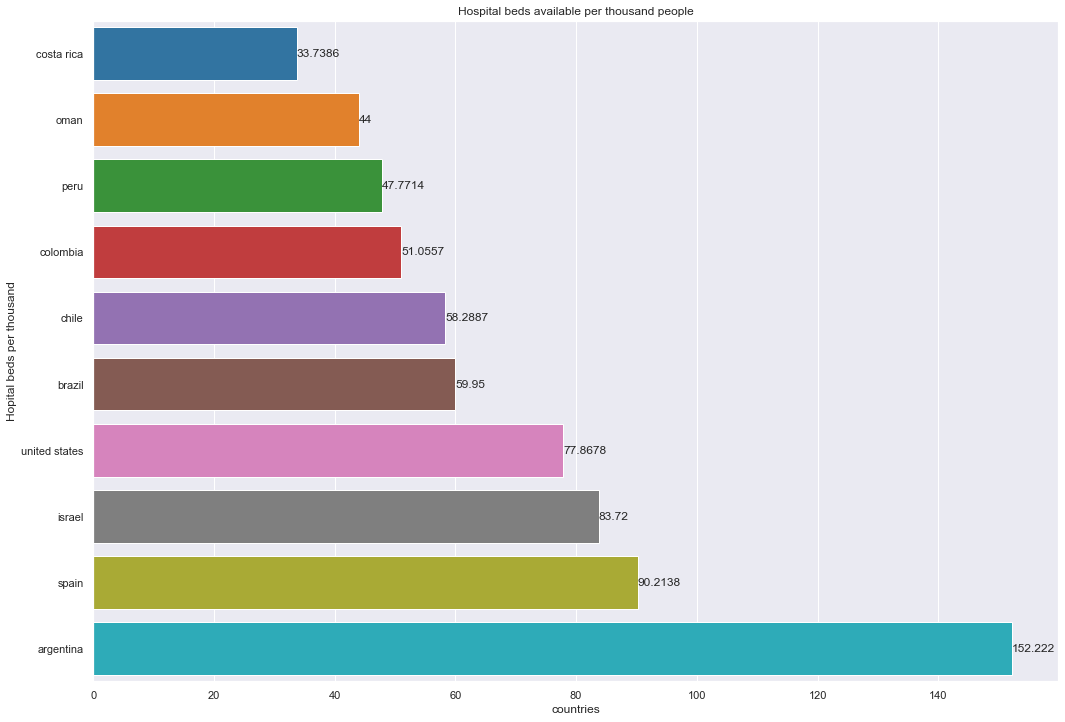

In [36]:
fig_dims = (15, 10)

fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x='hospital_beds_per_thousand', y='location',
                 data=data,
                 errwidth=0, palette="tab10")
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.title('Hospital beds available per thousand people')
plt.xlabel('countries')
plt.ylabel('Hopital beds per thousand')
plt.show()